<a href="https://colab.research.google.com/github/xurobaebae/praktisi_mengajar/blob/main/Pert2_PKKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pizza = {'diameter' : [6,8,10,14,18],
         'harga' : [7,9,13,17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


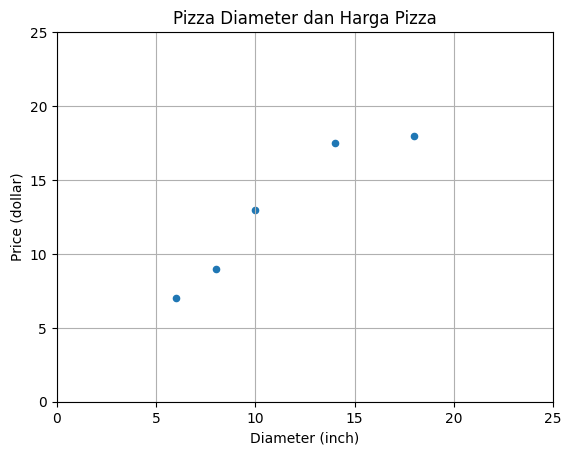

In [ ]:
pizza_df.plot(kind='scatter',x='diameter',y='harga')

plt.title('Pizza Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Price (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [ ]:
x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x = {x}')
print(f'y = {y}')

x = [ 6  8 10 14 18]
y = [ 7.   9.  13.  17.5 18. ]


In [ ]:
x = x.reshape(-1,1)
x.shape

(5, 1)

In [ ]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
x_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(x_vis)


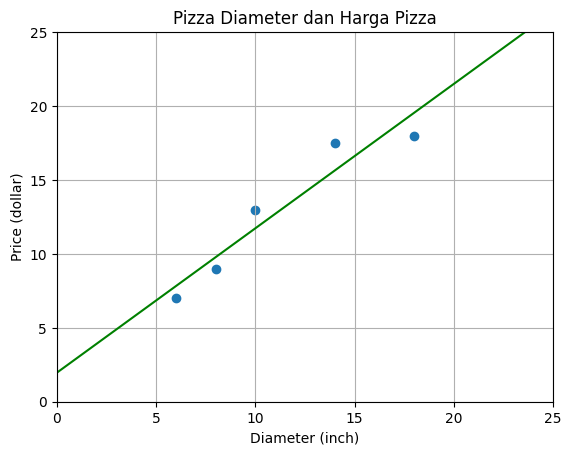

In [ ]:
plt.scatter(x,y)
plt.plot(x_vis,y_vis,'-g')

plt.title('Pizza Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Price (dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [ ]:
print(f'intercept = {model.intercept_}')
print(f'slope = {model.coef_}')


intercept = 1.965517241379315
slope = [0.9762931]


#mencari nilai slope

In [ ]:
print(f'x:\n{x}\n')
print(f'x flatten {x.flatten()}\n')
print(f'y:{y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten [ 6  8 10 14 18]

y:[ 7.   9.  13.  17.5 18. ]


#variance

In [ ]:
variance_x= np.var(x.flatten(), ddof=1)

print(f'variance = {variance_x}')

variance = 23.2


#Covariance

In [ ]:
np.cov(x.flatten(),y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [ ]:
covariance_xy = np.cov(x.flatten(),y)[0,1]

print(f'covariance = {covariance_xy}')


covariance = 22.650000000000002


#Slope

In [ ]:
slope = covariance_xy/variance_x

print(f'slope = {slope}')

slope = 0.976293103448276


#Mencari nilai intercept

In [ ]:
intercept = model.intercept_

print(f'intercept = {intercept}')

intercept = 1.965517241379315


In [ ]:
intercept = np.mean(y) - slope*np.mean(x)

print(f'intercept = {intercept}')

intercept = 1.9655172413793096


#prediksi harga pizza

In [ ]:
diameter_pizza = np.array([12,20,23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [ ]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [ ]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter pizza = {dmtr}, prediksi harga pizza = {hrg}')

diameter pizza = [12], prediksi harga pizza = 13.681034482758621
diameter pizza = [20], prediksi harga pizza = 21.491379310344826
diameter pizza = [23], prediksi harga pizza = 24.42025862068965


#Evaluasi Simpler Linear Progression

##training and testing

In [ ]:
x_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

x_test = np.array([8,9,11, 16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18, 11])

##Training simpler linear progression model

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


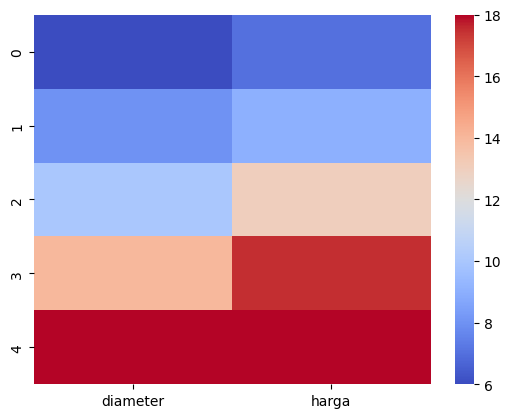

In [ ]:
sns.heatmap(pizza_df, cmap='coolwarm')
plt.show()

#KNM

In [ ]:
sensus = {
    'tinggi' : [158,170,183,191,155,163,180,150,178],
    'berat' : [64,86,84,80,49,59,67,54,67],
    'jk' : [
        'pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,150,54,wanita
8,178,67,wanita


#Visualisasi Data

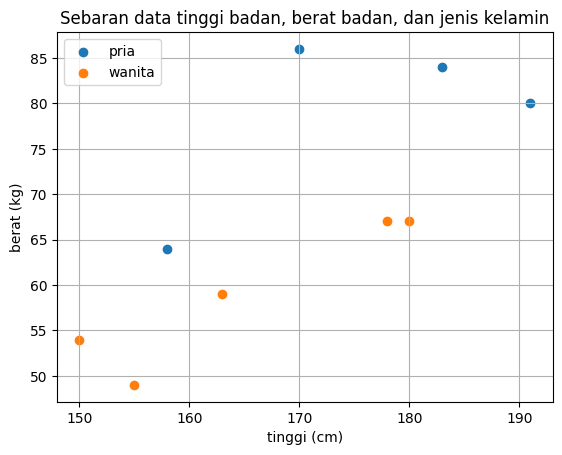

In [ ]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'],label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi (cm)')
plt.ylabel('berat (kg)')
plt.grid(True)
plt.show()

#Klasifikasi

In [ ]:
x_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [150  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_pen = lb.fit_transform(y_train)

print(f'y_train:\n{y_train_pen}\n')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]



In [ ]:
y_train_pen = y_train_pen.flatten()
print(f'y_train_pen: {y_train_pen}')

y_train_pen: [0 0 0 0 1 1 1 1 1]


#Training KNN Classification Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K=3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train,y_train_pen)

KNeighborsClassifier(n_neighbors=3)

#Prediksi Jenis Kelasmin

In [ ]:
tinggi_badan = 155
berat_badan = 70

x_new = np.array([tinggi_badan,berat_badan]).reshape(1,-1)
x_new


array([[155,  70]])

In [ ]:
y_new = model.predict(x_new)
y_new

array([1])

In [ ]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

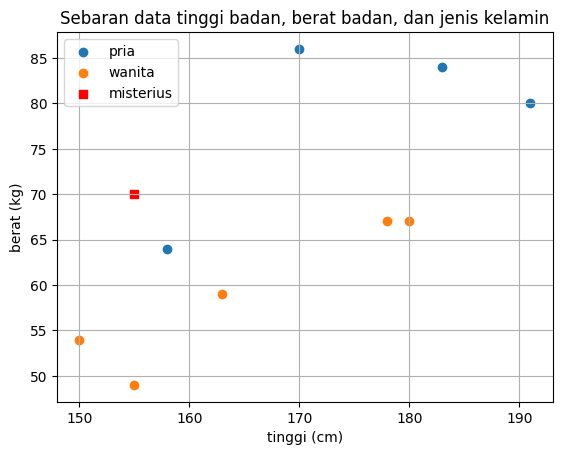

In [ ]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'],label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran data tinggi badan, berat badan, dan jenis kelamin')
plt.xlabel('tinggi (cm)')
plt.ylabel('berat (kg)')
plt.grid(True)
plt.show()

In [ ]:
misterius = np.array([tinggi_badan,berat_badan])
misterius

array([155,  70])

In [ ]:
x_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [150,  54],
       [178,  67]])

In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius,d) for d in x_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.76305461424021,
 23.194827009486403]

In [ ]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,150,54,wanita,16.763055
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [ ]:
x_test = np.array([[168,65],[180,92],[160,52],[169,67]])
y_test = lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print(f'x_test:\n{x_test}\n')
print(f'y_test:\n{y_test}')

x_test:
[[168  65]
 [180  92]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)

print(f'Accuracy:{acc}')

Accuracy:0.75


In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_test,y_pred)

print(f'Recall:{rec}')

Recall:1.0


In [ ]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test,y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install fpdf

E: Package 'libfluidsynth1' has no installation candidate
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=e06898cade6a514e95849da19cf94ecd59c8172abe94e8646c0292dfe6173386
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Classification Report", ln=1, align="C")
pdf.multi_cell(0, 10, txt=cls_report)
pdf.output("classification_report.pdf")

<bound method FPDF.output of <fpdf.fpdf.FPDF object at 0x7e2b07d10dc0>>